# Linear Regression Under the Hood
## SkLearn Under the Hood Project

---

## 📚 Notebook Structure

This notebook is organized into **13 sections** for a complete learning experience:

| # | Section | Description |
|---|---------|-------------|
| **0** | **Project Introduction** | Overview, goals, and library rules |
| **1** | **Library Imports** | Setup and configuration ✅ |
| **2** | **Mathematical Definitions** | Formulas, loss, gradients, normal equation |
| **3** | **Data Generation** | Create synthetic 1D data |
| **4** | **Closed-Form Solution** | Normal Equation implementation |
| **5** | **Loss & Gradient Functions** | Core MSE and derivatives |
| **6** | **Gradient Descent** | Iterative optimization with trace |
| **7** | **Loss Surface** | 3D visualization of J(w, b) |
| **8** | **Visualization Functions** | Helper plotting functions |
| **9** | **Simple Slider** | Basic step-through (for beginners) ⭐ |
| **10** | **Advanced Dashboard** | Full interactive control panel ✨ |
| **11** | **Sklearn Validation** | Compare with scikit-learn + metrics |
| **12** | **Residual Analysis** | 4 diagnostic plots |
| **13** | **Summary** | Key takeaways and next steps |

---

## 🎮 How to Use This Notebook

### Quick Start (Advanced Dashboard):
1. **Run cells 1-8** to set up all functions
2. **Jump to Section 10** (Advanced Dashboard)
3. **Click "Generate Data"** button
4. **Adjust parameters** as desired
5. **Click "Run GD"** button
6. **Use slider** to explore gradient descent steps

### Full Learning Path:
- Work through sections **1-9 sequentially** for foundational understanding
- Use **Section 9** (simple slider) for basic step-by-step visualization
- Use **Section 10** (advanced dashboard) for full experimentation
- Review **Section 11-12** for model validation and diagnostics

### Interactive Features:
- 📊 **Full control** over data generation (samples, noise, true parameters)
- 🎯 **Tune GD parameters** (learning rate, iterations, initial values)
- 👁️ **Visualization options** (show residuals, closed-form solution, GD path)
- 🕹️ **Interactive buttons** (step-by-step progression, reset)

---


# 0. Project Introduction
## Linear Regression Under the Hood - SkLearn Under the Hood Project

### Project Goal
Rebuild scikit-learn's Linear Regression **from scratch** using only NumPy and basic Python, and visually demonstrate:
1. **Closed-form (Normal Equation)** solution
2. **Gradient Descent** iterative optimization
3. **Loss surface** visualization and parameter movement

### Library Usage Rules
**✅ Allowed:**
- `numpy`, `pandas`, `matplotlib`, `ipywidgets`, `scipy`
- `sklearn` (validation only - final section)

**❌ Not Allowed in Core Logic:**
- `sklearn.linear_model.LinearRegression`
- `sklearn.linear_model.SGDRegressor`

All core computations (predictions, loss, gradients, normal equation) must be implemented explicitly with NumPy.

### What You'll Learn
- Mathematical foundations of linear regression
- Two solution methods: Closed-form vs Gradient Descent
- Loss surface geometry and optimization paths
- Model evaluation metrics (R², MSE, RMSE, MAE)
- Residual analysis and diagnostics


In [26]:
# 1. Import Libraries and Configuration

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display, clear_output
from scipy import stats

# Matplotlib configuration
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10
plt.style.use('seaborn-v0_8-darkgrid')

print("✅ All libraries imported successfully")
print("📊 This notebook implements Linear Regression without using sklearn's solvers")


✅ All libraries imported successfully
📊 This notebook implements Linear Regression without using sklearn's solvers


## 2. Mathematical Definitions

### Data
- **X ∈ ℝⁿˣ¹**: Input features (1D, shape: (n, 1))
- **y ∈ ℝⁿ**: Target values (shape: (n,))

### Model
For each sample i:
$$\hat{y}_i = w \cdot x_i + b$$

Where:
- **w**: weight/slope
- **b**: bias/intercept

### Loss Function (Mean Squared Error)
$$J(w, b) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \frac{1}{n} \sum_{i=1}^{n} (y_i - (w \cdot x_i + b))^2$$

### Gradients
$$\frac{\partial J}{\partial w} = \frac{2}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i) \cdot x_i$$

$$\frac{\partial J}{\partial b} = \frac{2}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)$$

### Gradient Descent Update
$$w_{new} = w_{old} - \eta \cdot \frac{\partial J}{\partial w}$$

$$b_{new} = b_{old} - \eta \cdot \frac{\partial J}{\partial b}$$

Where **η** is the learning rate

### Normal Equation (Closed-Form Solution)
Build design matrix with bias:
$$X_{bias} = [\mathbf{1}, X] \in \mathbb{R}^{n \times 2}$$

Parameter vector:
$$\theta = \begin{bmatrix} b \\ w \end{bmatrix}$$

Model: $\hat{y} = X_{bias} \cdot \theta$

Solution satisfies:
$$(X_{bias}^T X_{bias}) \theta = X_{bias}^T y$$

Implemented using `np.linalg.solve` (NOT `np.linalg.inv` for numerical stability)


✅ Data generation complete
   X shape: (100, 1)
   y shape: (100,)
   True parameters: w=2.5, b=3.0

Data samples (first 5):


,x,y
0,-3.000000,-3.754929
1,-2.939394,-4.555881
2,-2.878788,-3.225437
3,-2.818182,-1.760910
4,-2.757576,-4.245169


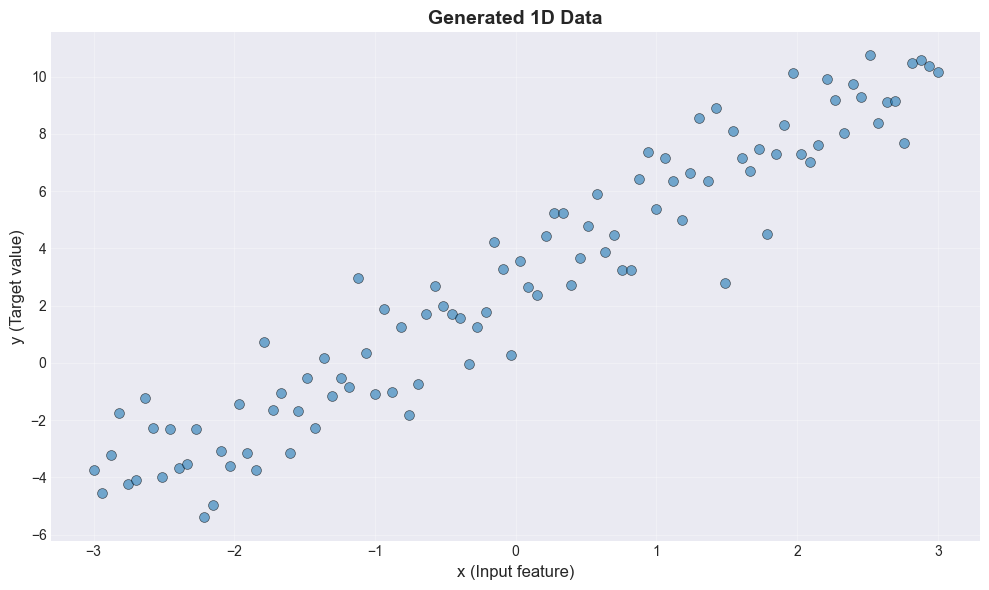

📊 Scatter plot shows noisy linear relationship


In [27]:
# 3. Data Generation (1D Synthetic Data)

def generate_1d_data(n_samples=100, true_w=2.5, true_b=3.0, noise_std=1.5, seed=42):
    """
    Generate 1D linear regression data
    
    Parameters:
    -----------
    n_samples : int
        Number of samples
    true_w : float
        True weight (slope)
    true_b : float
        True bias (intercept)
    noise_std : float
        Standard deviation of Gaussian noise
    seed : int
        Random seed for reproducibility
    
    Returns:
    --------
    X : ndarray, shape (n, 1)
        Input features
    y : ndarray, shape (n,)
        Target values
    """
    np.random.seed(seed)
    
    # Generate x values uniformly in [-3, 3]
    X = np.linspace(-3, 3, n_samples).reshape(-1, 1)
    
    # y = true_w * x + true_b + Gaussian noise
    y = true_w * X.flatten() + true_b + np.random.randn(n_samples) * noise_std
    
    return X, y

# Generate dataset
X, y = generate_1d_data(n_samples=100, true_w=2.5, true_b=3.0, noise_std=1.5, seed=42)

print(f"✅ Data generation complete")
print(f"   X shape: {X.shape}")
print(f"   y shape: {y.shape}")
print(f"   True parameters: w=2.5, b=3.0")
print()

# Display as DataFrame
df = pd.DataFrame({'x': X.flatten(), 'y': y})
print("Data samples (first 5):")
display(df.head())

# Visualize data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, s=50, edgecolors='k', linewidth=0.5)
plt.xlabel('x (Input feature)', fontsize=12)
plt.ylabel('y (Target value)', fontsize=12)
plt.title('Generated 1D Data', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("📊 Scatter plot shows noisy linear relationship")


✅ Closed-form solution computed
   b (bias/intercept) = 2.8442
   w (weight/slope)   = 2.5345

   True parameters: b=3.0, w=2.5
   (May differ slightly due to noise)


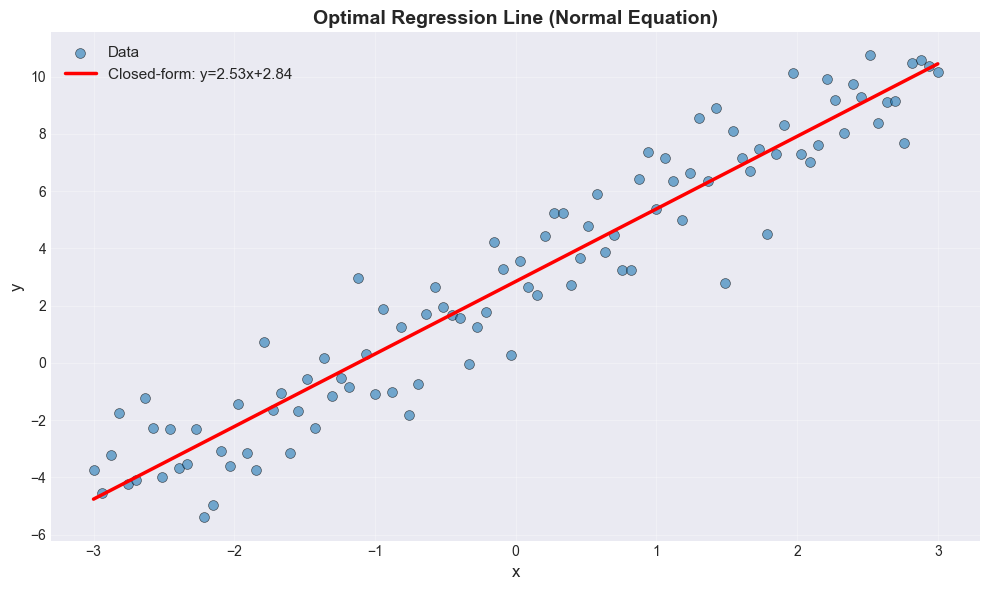

🎯 Normal equation finds optimal solution in one step (no iterations)


In [28]:
# 4. Closed-Form Solution (Normal Equation)

def fit_linreg_closed_form(X, y):
    """
    Compute optimal parameters using Normal Equation
    
    Formula:
    - Design matrix: X_bias = [1, X]
    - Parameter vector: θ = [b, w]^T
    - Normal equation: (X_bias^T X_bias)θ = X_bias^T y
    
    Parameters:
    -----------
    X : ndarray, shape (n, 1)
        Input features
    y : ndarray, shape (n,)
        Target values
    
    Returns:
    --------
    b_hat : float
        Estimated bias (intercept)
    w_hat : float
        Estimated weight (slope)
    """
    n = X.shape[0]
    
    # Add column of ones for bias term
    X_bias = np.c_[np.ones(n), X]  # shape: (n, 2)
    
    # Compute A = X_bias^T X_bias (2x2 matrix)
    A = X_bias.T @ X_bias
    
    # Compute b_vec = X_bias^T y (2x1 vector)
    b_vec = X_bias.T @ y
    
    # Solve linear system: A θ = b_vec
    # Use np.linalg.solve instead of inv for numerical stability
    theta = np.linalg.solve(A, b_vec)
    
    # Extract b and w from θ = [b, w]
    b_hat = theta[0]
    w_hat = theta[1]
    
    return b_hat, w_hat

# Compute optimal parameters
b_cf, w_cf = fit_linreg_closed_form(X, y)

print("✅ Closed-form solution computed")
print(f"   b (bias/intercept) = {b_cf:.4f}")
print(f"   w (weight/slope)   = {w_cf:.4f}")
print()
print(f"   True parameters: b=3.0, w=2.5")
print(f"   (May differ slightly due to noise)")

# Visualize closed-form solution
x_line = np.linspace(X.min(), X.max(), 100)
y_line_cf = w_cf * x_line + b_cf

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, s=50, edgecolors='k', linewidth=0.5, label='Data')
plt.plot(x_line, y_line_cf, 'r-', linewidth=2.5, label=f'Closed-form: y={w_cf:.2f}x+{b_cf:.2f}')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Optimal Regression Line (Normal Equation)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("🎯 Normal equation finds optimal solution in one step (no iterations)")


In [29]:
# 5. Loss and Gradient Functions

def compute_loss(X, y, w, b):
    """
    Compute Mean Squared Error (MSE) loss
    
    Formula:
        J(w, b) = (1/n) Σᵢ₌₁ⁿ (yᵢ - (w·xᵢ + b))²
    
    Parameters:
    -----------
    X : ndarray, shape (n, 1)
        Input features
    y : ndarray, shape (n,)
        Target values
    w : float
        Weight
    b : float
        Bias
    
    Returns:
    --------
    loss : float
        MSE loss value
    """
    n = len(y)
    
    # Compute predictions
    y_pred = w * X.flatten() + b
    
    # Compute residuals
    residuals = y_pred - y
    
    # Compute MSE
    loss = (residuals ** 2).mean()
    
    return loss


def compute_gradients(X, y, w, b):
    """
    Compute gradients of loss function
    
    Formulas:
        ∂J/∂w = (2/n) Σᵢ₌₁ⁿ (ŷᵢ - yᵢ)·xᵢ
        ∂J/∂b = (2/n) Σᵢ₌₁ⁿ (ŷᵢ - yᵢ)
    
    Parameters:
    -----------
    X : ndarray, shape (n, 1)
        Input features
    y : ndarray, shape (n,)
        Target values
    w : float
        Weight
    b : float
        Bias
    
    Returns:
    --------
    grad_w : float
        Gradient with respect to w
    grad_b : float
        Gradient with respect to b
    """
    n = len(y)
    
    # Compute predictions
    y_pred = w * X.flatten() + b
    
    # Compute residuals
    residuals = y_pred - y
    
    # Compute gradients
    grad_w = (2.0 / n) * np.sum(residuals * X.flatten())
    grad_b = (2.0 / n) * np.sum(residuals)
    
    return grad_w, grad_b


# Test functions
w_test, b_test = 0.0, 0.0
loss_test = compute_loss(X, y, w_test, b_test)
grad_w_test, grad_b_test = compute_gradients(X, y, w_test, b_test)

print("✅ Loss and gradient functions implemented")
print(f"\nTest at (w=0, b=0):")
print(f"   Loss:     {loss_test:.4f}")
print(f"   ∂J/∂w:    {grad_w_test:.4f}")
print(f"   ∂J/∂b:    {grad_b_test:.4f}")
print(f"\n💡 Gradients tell us which direction to move parameters to reduce loss")


✅ Loss and gradient functions implemented

Test at (w=0, b=0):
   Loss:     29.5833
   ∂J/∂w:    -15.5141
   ∂J/∂b:    -5.6885

💡 Gradients tell us which direction to move parameters to reduce loss


✅ Gradient descent complete
   Initial:  w=0.0000, b=0.0000
   Learning rate: 0.05
   Steps: 80

Last step (step 79):
   w = 2.5345
   b = 2.8435
   loss = 1.8335

Compare with closed-form:
   w_cf = 2.5345  (diff: 0.0000)
   b_cf = 2.8442  (diff: 0.0007)


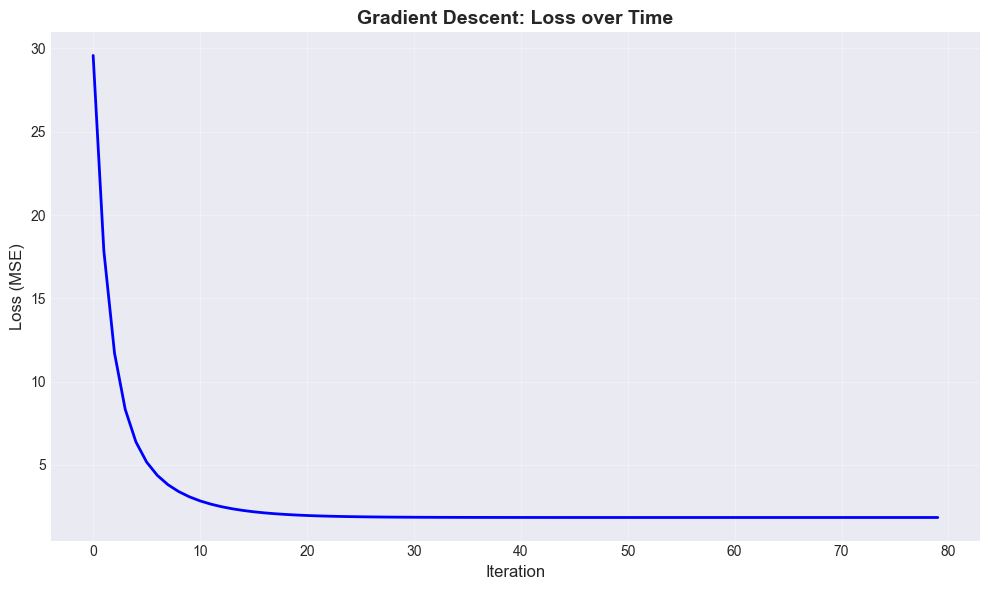

📉 Loss decreases monotonically (GD moving toward minimum)


In [30]:
# 6. Gradient Descent with Trace

def run_gd_with_trace(X, y, w_init, b_init, lr, n_steps):
    """
    Run gradient descent and record each step
    
    Update rule:
        w_new = w_old - η · ∂J/∂w
        b_new = b_old - η · ∂J/∂b
    
    Parameters:
    -----------
    X : ndarray, shape (n, 1)
        Input features
    y : ndarray, shape (n,)
        Target values
    w_init : float
        Initial value for w
    b_init : float
        Initial value for b
    lr : float
        Learning rate (η)
    n_steps : int
        Number of iterations
    
    Returns:
    --------
    trace : list of dict
        List containing info for each step
        Each dict contains: step, w, b, loss, grad_w, grad_b
    """
    # Initialize parameters
    w = float(w_init)
    b = float(b_init)
    
    # Trace list
    trace = []
    
    for step in range(n_steps):
        # Compute current loss
        loss = compute_loss(X, y, w, b)
        
        # Compute current gradients
        grad_w, grad_b = compute_gradients(X, y, w, b)
        
        # Save current state
        trace.append({
            'step': step,
            'w': w,
            'b': b,
            'loss': loss,
            'grad_w': grad_w,
            'grad_b': grad_b,
        })
        
        # Update parameters
        w = w - lr * grad_w
        b = b - lr * grad_b
    
    return trace


# Run gradient descent
w_init = 0.0
b_init = 0.0
learning_rate = 0.05
n_steps = 80

trace = run_gd_with_trace(X, y, w_init, b_init, learning_rate, n_steps)

print(f"✅ Gradient descent complete")
print(f"   Initial:  w={w_init:.4f}, b={b_init:.4f}")
print(f"   Learning rate: {learning_rate}")
print(f"   Steps: {n_steps}")
print()

# Print last step
last = trace[-1]
print(f"Last step (step {last['step']}):")
print(f"   w = {last['w']:.4f}")
print(f"   b = {last['b']:.4f}")
print(f"   loss = {last['loss']:.4f}")
print()
print(f"Compare with closed-form:")
print(f"   w_cf = {w_cf:.4f}  (diff: {abs(last['w'] - w_cf):.4f})")
print(f"   b_cf = {b_cf:.4f}  (diff: {abs(last['b'] - b_cf):.4f})")

# Plot loss over iterations
steps_list = [t['step'] for t in trace]
loss_list = [t['loss'] for t in trace]

plt.figure(figsize=(10, 6))
plt.plot(steps_list, loss_list, 'b-', linewidth=2)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.title('Gradient Descent: Loss over Time', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("📉 Loss decreases monotonically (GD moving toward minimum)")


✅ Loss surface computed
   w range: [0.53, 4.53]
   b range: [-0.16, 5.84]
   Grid size: (60, 60)
   Min loss: 1.8396
   Max loss: 23.0760


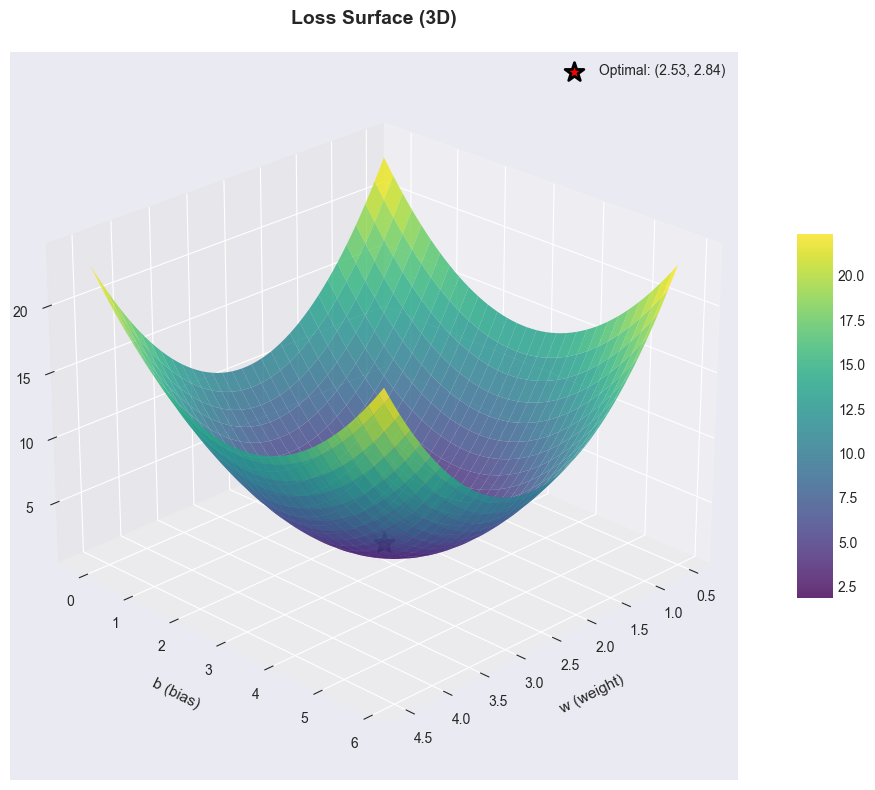

🏔️  Loss surface is bowl-shaped
    Gradient descent descends along this surface


In [31]:
# 7. Loss Surface in Parameter Space J(w, b)

def compute_loss_surface(X, y, w_range, b_range, num_points=50):
    """
    Compute loss surface J(w, b) in parameter space (OPTIMIZED with vectorization)
    
    Parameters:
    -----------
    X : ndarray, shape (n, 1)
        Input features
    y : ndarray, shape (n,)
        Target values
    w_range : tuple (w_min, w_max)
        Range for w
    b_range : tuple (b_min, b_max)
        Range for b
    num_points : int
        Number of grid points per axis (default: 50 for speed)
    
    Returns:
    --------
    W : ndarray, shape (num_points, num_points)
        w grid
    B : ndarray, shape (num_points, num_points)
        b grid
    J_vals : ndarray, shape (num_points, num_points)
        Loss values at each (w, b)
    """
    # Create grid
    w_vec = np.linspace(w_range[0], w_range[1], num_points)
    b_vec = np.linspace(b_range[0], b_range[1], num_points)
    W, B = np.meshgrid(w_vec, b_vec)
    
    # Vectorized loss computation for efficiency
    X_flat = X.flatten()
    # Reshape for broadcasting: W and B are (num_points, num_points)
    # predictions shape: (n_samples, num_points, num_points)
    predictions = W[np.newaxis, :, :] * X_flat[:, np.newaxis, np.newaxis] + B[np.newaxis, :, :]
    residuals = predictions - y[:, np.newaxis, np.newaxis]
    J_vals = np.mean(residuals ** 2, axis=0)
    
    return W, B, J_vals


# Compute loss surface
# Set range around optimal solution
w_margin = 2.0
b_margin = 3.0
w_range = (w_cf - w_margin, w_cf + w_margin)
b_range = (b_cf - b_margin, b_cf + b_margin)

# Reduced to 50 points (2500 computations) for faster rendering
W_grid, B_grid, J_grid = compute_loss_surface(X, y, w_range, b_range, num_points=50)

print(f"✅ Loss surface computed")
print(f"   w range: [{w_range[0]:.2f}, {w_range[1]:.2f}]")
print(f"   b range: [{b_range[0]:.2f}, {b_range[1]:.2f}]")
print(f"   Grid size: {W_grid.shape}")
print(f"   Min loss: {J_grid.min():.4f}")
print(f"   Max loss: {J_grid.max():.4f}")

# 3D loss surface visualization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.plot_surface(W_grid, B_grid, J_grid, cmap='viridis', alpha=0.8, edgecolor='none')

# Mark optimal point
ax.scatter([w_cf], [b_cf], [compute_loss(X, y, w_cf, b_cf)], 
           color='red', s=200, marker='*', edgecolors='k', linewidths=2,
           label=f'Optimal: ({w_cf:.2f}, {b_cf:.2f})')

# Labels
ax.set_xlabel('w (weight)', fontsize=11, labelpad=10)
ax.set_ylabel('b (bias)', fontsize=11, labelpad=10)
ax.set_zlabel('J(w, b) (loss)', fontsize=11, labelpad=10)
ax.set_title('Loss Surface (3D)', fontsize=14, fontweight='bold', pad=20)
ax.legend(fontsize=10)

# Colorbar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

# Set viewing angle
ax.view_init(elev=25, azim=45)

plt.tight_layout()
plt.show()

print("🏔️  Loss surface is bowl-shaped")
print("    Gradient descent descends along this surface")


In [39]:
# 8. Visualization Helper Functions

def plot_data_and_line(X, y, w, b, w_cf, b_cf, ax, show_cf=True):
    """
    Plot data and regression line (data space)
    
    Parameters:
    -----------
    X : ndarray
        Input features
    y : ndarray
        Target values
    w : float
        Current weight
    b : float
        Current bias
    w_cf : float
        Closed-form weight
    b_cf : float
        Closed-form bias
    ax : matplotlib axis
        Axis to plot on
    show_cf : bool
        Whether to show closed-form solution
    """
    x_line = np.linspace(X.min(), X.max(), 100)
    y_line_current = w * x_line + b
    
    # Data points
    ax.scatter(X, y, alpha=0.6, s=50, edgecolors='k', linewidth=0.5, label='Data')
    
    # Current regression line
    ax.plot(x_line, y_line_current, 'b-', linewidth=2.5, 
            label=f'Current: y={w:.2f}x+{b:.2f}')
    
    # Closed-form solution (optional)
    if show_cf:
        y_line_cf = w_cf * x_line + b_cf
        ax.plot(x_line, y_line_cf, 'g--', linewidth=2, alpha=0.7,
                label=f'Target: y={w_cf:.2f}x+{b_cf:.2f}')
    
    ax.set_xlabel('x', fontsize=11)
    ax.set_ylabel('y', fontsize=11)
    ax.set_title('Data Space', fontsize=13, fontweight='bold')
    ax.legend(fontsize=9, loc='upper left')
    ax.grid(True, alpha=0.3)


def plot_loss_contour_and_path(W, B, J_vals, trace, current_step, w_cf, b_cf, ax):
    """
    Plot loss contour and gradient descent path (parameter space)
    
    Parameters:
    -----------
    W, B, J_vals : ndarray
        Loss surface grid
    trace : list of dict
        Gradient descent trace
    current_step : int
        Current step
    w_cf, b_cf : float
        Closed-form solution
    ax : matplotlib axis
        Axis to plot on
    """
    # Draw contour
    levels = 20
    contour = ax.contour(W, B, J_vals, levels=levels, cmap='viridis', alpha=0.6)
    ax.clabel(contour, inline=True, fontsize=8, fmt='%.1f')
    
    # Full path (gray)
    w_path = [t['w'] for t in trace]
    b_path = [t['b'] for t in trace]
    ax.plot(w_path, b_path, 'o-', color='gray', markersize=3, linewidth=1, 
            alpha=0.4, label='Full path')
    
    # Path up to current step (red)
    w_path_current = [trace[i]['w'] for i in range(min(current_step + 1, len(trace)))]
    b_path_current = [trace[i]['b'] for i in range(min(current_step + 1, len(trace)))]
    ax.plot(w_path_current, b_path_current, 'o-', color='red', markersize=4, 
            linewidth=1.5, label=f'Up to step {current_step}')
    
    # Highlight current position
    if current_step < len(trace):
        w_curr = trace[current_step]['w']
        b_curr = trace[current_step]['b']
        ax.scatter([w_curr], [b_curr], color='yellow', s=200, marker='o', 
                   edgecolors='k', linewidths=2, zorder=5, label='Current')
    
    # Mark optimal position
    ax.scatter([w_cf], [b_cf], color='lime', s=150, marker='*', 
               edgecolors='k', linewidths=2, zorder=5, label='Optimal')
    
    ax.set_xlabel('w (weight)', fontsize=11)
    ax.set_ylabel('b (bias)', fontsize=11)
    ax.set_title('Parameter Space (Loss Contour)', fontsize=13, fontweight='bold')
    ax.legend(fontsize=9, loc='upper right')
    ax.grid(True, alpha=0.3)


print("✅ Visualization helper functions defined")


✅ Visualization helper functions defined


In [33]:
# 9. Interactive Widget (ipywidgets Slider)

def visualize_step(step):
    """
    Visualize gradient descent state at given step
    
    Parameters:
    -----------
    step : int
        Step number to visualize
    """
    # Current parameters
    w_curr = trace[step]['w']
    b_curr = trace[step]['b']
    loss_curr = trace[step]['loss']
    grad_w_curr = trace[step]['grad_w']
    grad_b_curr = trace[step]['grad_b']
    
    # Create 2 subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Left: Data space (regression line)
    plot_data_and_line(X, y, w_curr, b_curr, w_cf, b_cf, axes[0], show_cf=True)
    
    # Right: Parameter space (contour)
    plot_loss_contour_and_path(W_grid, B_grid, J_grid, trace, step, w_cf, b_cf, axes[1])
    
    # Overall title
    fig.suptitle(
        f'Gradient Descent Step {step}/{n_steps-1}\n'
        f'w={w_curr:.4f}, b={b_curr:.4f}, Loss={loss_curr:.4f}\n'
        f'∂J/∂w={grad_w_curr:.4f}, ∂J/∂b={grad_b_curr:.4f}',
        fontsize=14, fontweight='bold', y=1.02
    )
    
    plt.tight_layout()
    plt.show()


# Create interactive slider
print("🎮 Move the slider to see each step of gradient descent!")
print()

step_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=n_steps - 1,
    step=1,
    description='Step:',
    continuous_update=False,  # For performance
    style={'description_width': '100px'},
    layout=widgets.Layout(width='600px')
)

# Connect widget to function
widgets.interact(visualize_step, step=step_slider)


🎮 Move the slider to see each step of gradient descent!



interactive(children=(IntSlider(value=0, continuous_update=False, description='Step:', layout=Layout(width='60…

<function __main__.visualize_step(step)>

In [ ]:
# 10. Advanced Interactive Dashboard (K-Means Style)

class LinearRegressionDashboard:
    """
    K-means style interactive linear regression dashboard
    """
    
    def __init__(self):
        self.X = None
        self.y = None
        self.trace = None
        self.w_cf = None
        self.b_cf = None
        self.W_grid = None
        self.B_grid = None
        self.J_grid = None
        self.current_step = 0
        
        # ========================================
        # Data Generation Parameters
        # ========================================
        self.n_samples_slider = widgets.IntSlider(
            value=100, min=50, max=300, step=25,
            description='n_samples:',
            style={'description_width': '160px'},
            layout=widgets.Layout(width='400px')
        )
        
        self.true_w_slider = widgets.FloatSlider(
            value=2.5, min=-5.0, max=5.0, step=0.5,
            description='true_w:',
            style={'description_width': '160px'},
            layout=widgets.Layout(width='400px')
        )
        
        self.true_b_slider = widgets.FloatSlider(
            value=3.0, min=-5.0, max=5.0, step=0.5,
            description='true_b:',
            style={'description_width': '160px'},
            layout=widgets.Layout(width='400px')
        )
        
        self.noise_slider = widgets.FloatSlider(
            value=1.5, min=0.1, max=3.0, step=0.1,
            description='noise_std:',
            style={'description_width': '160px'},
            layout=widgets.Layout(width='400px')
        )
        
        self.data_seed_slider = widgets.IntSlider(
            value=42, min=0, max=100, step=1,
            description='seed:',
            style={'description_width': '160px'},
            layout=widgets.Layout(width='400px')
        )
        
        # ========================================
        # Gradient Descent Parameters
        # ========================================
        self.lr_slider = widgets.FloatSlider(
            value=0.05, min=0.001, max=0.2, step=0.005,
            description='learning_rate:',
            style={'description_width': '160px'},
            layout=widgets.Layout(width='400px'),
            readout_format='.3f'
        )
        
        self.n_steps_slider = widgets.IntSlider(
            value=80, min=10, max=200, step=10,
            description='n_steps:',
            style={'description_width': '160px'},
            layout=widgets.Layout(width='400px')
        )
        
        self.w_init_slider = widgets.FloatSlider(
            value=0.0, min=-3.0, max=3.0, step=0.1,
            description='w_init:',
            style={'description_width': '160px'},
            layout=widgets.Layout(width='400px')
        )
        
        self.b_init_slider = widgets.FloatSlider(
            value=0.0, min=-3.0, max=3.0, step=0.1,
            description='b_init:',
            style={'description_width': '160px'},
            layout=widgets.Layout(width='400px')
        )
        
        # ========================================
        # Visualization Options
        # ========================================
        self.show_residuals = widgets.Checkbox(
            value=False,
            description='Show Residuals',
            style={'description_width': 'initial'}
        )
        
        self.show_closed_form = widgets.Checkbox(
            value=True,
            description='Show Closed-Form',
            style={'description_width': 'initial'}
        )
        
        self.show_gd_path = widgets.Checkbox(
            value=True,
            description='Show GD Path',
            style={'description_width': 'initial'}
        )
        
        # ========================================
        # Step Control
        # ========================================
        self.step_slider = widgets.IntSlider(
            value=0, min=0, max=0, step=1,
            description='Step:',
            style={'description_width': '160px'},
            layout=widgets.Layout(width='500px'),
            continuous_update=False
        )
        
        # ========================================
        # Buttons
        # ========================================
        self.gen_data_button = widgets.Button(
            description='Generate Data',
            button_style='info',
            icon='database',
            layout=widgets.Layout(width='220px')
        )
        
        self.run_gd_button = widgets.Button(
            description='Run GD',
            button_style='success',
            icon='play',
            layout=widgets.Layout(width='220px')
        )
        
        self.next_step_button = widgets.Button(
            description='Next Step',
            button_style='warning',
            icon='step-forward',
            layout=widgets.Layout(width='220px')
        )
        
        self.reset_button = widgets.Button(
            description='Reset',
            button_style='danger',
            icon='refresh',
            layout=widgets.Layout(width='220px')
        )
        
        # ========================================
        # Output Widgets
        # ========================================
        self.plot_output = widgets.Output(
            layout=widgets.Layout(width='100%', height='600px')
        )
        
        self.info_output = widgets.Output(
            layout=widgets.Layout(width='100%', height='200px')
        )
        
        # Connect button events
        self.gen_data_button.on_click(self.generate_data_callback)
        self.run_gd_button.on_click(self.run_gd_callback)
        self.next_step_button.on_click(self.next_step_callback)
        self.reset_button.on_click(self.reset_callback)
        self.step_slider.observe(self.step_changed_callback, names='value')
        
    def generate_data_callback(self, b):
        """Generate data callback"""
        with self.info_output:
            clear_output(wait=True)
            print("🔄 Generating data...")
            
        # Generate data
        n = self.n_samples_slider.value
        true_w = self.true_w_slider.value
        true_b = self.true_b_slider.value
        noise = self.noise_slider.value
        seed = self.data_seed_slider.value
        
        np.random.seed(seed)
        self.X = np.linspace(-3, 3, n).reshape(-1, 1)
        self.y = true_w * self.X.flatten() + true_b + np.random.randn(n) * noise
        
        # Compute optimal solution via normal equation
        self.b_cf, self.w_cf = fit_linreg_closed_form(self.X, self.y)
        
        # Compute loss surface
        w_range = (self.w_cf - 2, self.w_cf + 2)
        b_range = (self.b_cf - 3, self.b_cf + 3)
        self.W_grid, self.B_grid, self.J_grid = compute_loss_surface(
            self.X, self.y, w_range, b_range, num_points=50
        )
        
        # Initialize trace
        self.trace = None
        self.current_step = 0
        self.step_slider.max = 0
        self.step_slider.value = 0
        
        with self.info_output:
            clear_output(wait=True)
            print("✅ Data generated!")
            print(f"   n_samples: {n}")
            print(f"   True params: w={true_w:.2f}, b={true_b:.2f}")
            print(f"   Closed-form: w={self.w_cf:.4f}, b={self.b_cf:.4f}")
            
        self.update_plot()
        
    def run_gd_callback(self, b):
        """Run GD callback"""
        if self.X is None:
            with self.info_output:
                clear_output(wait=True)
                print("⚠️  Please generate data first!")
            return
            
        with self.info_output:
            clear_output(wait=True)
            print("🔄 Running gradient descent...")
        
        # Run GD
        lr = self.lr_slider.value
        n_steps = self.n_steps_slider.value
        w_init = self.w_init_slider.value
        b_init = self.b_init_slider.value
        
        self.trace = run_gd_with_trace(self.X, self.y, w_init, b_init, lr, n_steps)
        self.step_slider.max = len(self.trace) - 1
        self.step_slider.value = len(self.trace) - 1
        self.current_step = len(self.trace) - 1
        
        with self.info_output:
            clear_output(wait=True)
            print("✅ Gradient descent complete!")
            print(f"   learning_rate: {lr:.3f}")
            print(f"   n_steps: {n_steps}")
            final = self.trace[-1]
            print(f"   Final params: w={final['w']:.4f}, b={final['b']:.4f}")
            print(f"   Final loss: {final['loss']:.4f}")
            print(f"   Diff from closed-form:")
            print(f"      Δw = {abs(final['w'] - self.w_cf):.6f}")
            print(f"      Δb = {abs(final['b'] - self.b_cf):.6f}")
            
        self.update_plot()
        
    def next_step_callback(self, b):
        """Next step callback"""
        if self.trace is None:
            with self.info_output:
                clear_output(wait=True)
                print("⚠️  Please run GD first!")
            return
            
        if self.current_step < len(self.trace) - 1:
            self.current_step += 1
            self.step_slider.value = self.current_step
            self.update_plot()
            
    def reset_callback(self, b):
        """Reset callback"""
        self.X = None
        self.y = None
        self.trace = None
        self.w_cf = None
        self.b_cf = None
        self.current_step = 0
        self.step_slider.max = 0
        self.step_slider.value = 0
        
        with self.info_output:
            clear_output(wait=True)
            print("🔄 Reset complete!")
            
        with self.plot_output:
            clear_output()
            
    def step_changed_callback(self, change):
        """Step changed callback"""
        if self.trace is not None:
            self.current_step = change['new']
            self.update_plot()
            
    def update_plot(self):
        """Update plot"""
        with self.plot_output:
            clear_output(wait=True)
            
            if self.X is None:
                print("📊 Please generate data")
                return
                
            fig, axes = plt.subplots(1, 2, figsize=(18, 7))
            
            # Left: Data space
            ax1 = axes[0]
            ax1.scatter(self.X, self.y, alpha=0.6, s=50, edgecolors='k', 
                       linewidth=0.5, label='Data', zorder=2)
            
            x_line = np.linspace(self.X.min(), self.X.max(), 100)
            
            # Closed-form solution
            if self.show_closed_form.value:
                y_line_cf = self.w_cf * x_line + self.b_cf
                ax1.plot(x_line, y_line_cf, 'g--', linewidth=2.5, alpha=0.7,
                        label=f'Closed-form: y={self.w_cf:.2f}x+{self.b_cf:.2f}',
                        zorder=3)
            
            # Current GD step
            if self.trace is not None and self.current_step < len(self.trace):
                step_data = self.trace[self.current_step]
                w_curr = step_data['w']
                b_curr = step_data['b']
                y_line_curr = w_curr * x_line + b_curr
                ax1.plot(x_line, y_line_curr, 'b-', linewidth=3,
                        label=f'GD (step {self.current_step}): y={w_curr:.2f}x+{b_curr:.2f}',
                        zorder=4)
                
                # Show residuals (optimized: max 20 lines for performance)
                if self.show_residuals.value:
                    y_pred = w_curr * self.X.flatten() + b_curr
                    step_size = max(1, len(self.X) // 20)  # Show max 20 residual lines
                    indices = range(0, len(self.X), step_size)
                    for i in indices:
                        ax1.plot([self.X[i], self.X[i]], [self.y[i], y_pred[i]],
                                'r-', alpha=0.3, linewidth=1, zorder=1)
                
            ax1.set_xlabel('x', fontsize=12)
            ax1.set_ylabel('y', fontsize=12)
            ax1.set_title('Data Space', fontsize=14, fontweight='bold')
            ax1.legend(fontsize=10, loc='upper left')
            ax1.grid(True, alpha=0.3)
            
            # Right: Parameter space
            ax2 = axes[1]
            
            # Contour
            if self.W_grid is not None:
                contour = ax2.contour(self.W_grid, self.B_grid, self.J_grid, 
                                     levels=20, cmap='viridis', alpha=0.6)
                ax2.clabel(contour, inline=True, fontsize=8, fmt='%.1f')
            
            # GD path
            if self.trace is not None and self.show_gd_path.value:
                w_path = [t['w'] for t in self.trace[:self.current_step+1]]
                b_path = [t['b'] for t in self.trace[:self.current_step+1]]
                ax2.plot(w_path, b_path, 'r-', linewidth=2, alpha=0.7,
                        label='GD path', zorder=3)
                ax2.scatter(w_path[::5], b_path[::5], c='red', s=30, zorder=4)
                
                # Current position
                if self.current_step < len(self.trace):
                    w_curr = self.trace[self.current_step]['w']
                    b_curr = self.trace[self.current_step]['b']
                    ax2.scatter([w_curr], [b_curr], c='yellow', s=200, marker='o',
                              edgecolors='k', linewidths=2, zorder=5,
                              label=f'Current (step {self.current_step})')
                
                # Start point
                w_start = self.trace[0]['w']
                b_start = self.trace[0]['b']
                ax2.scatter([w_start], [b_start], c='cyan', s=150, marker='s',
                          edgecolors='k', linewidths=2, zorder=5,
                          label='Start')
            
            # Optimal solution
            if self.w_cf is not None:
                ax2.scatter([self.w_cf], [self.b_cf], c='lime', s=200, marker='*',
                          edgecolors='k', linewidths=2, zorder=6,
                          label='Optimal')
            
            ax2.set_xlabel('w (weight)', fontsize=12)
            ax2.set_ylabel('b (bias)', fontsize=12)
            ax2.set_title('Parameter Space', fontsize=14, fontweight='bold')
            ax2.legend(fontsize=9, loc='upper right')
            ax2.grid(True, alpha=0.3)
            
            plt.tight_layout()
            plt.show()
            
    def create_dashboard(self):
        """Create dashboard"""
        # Data generation section
        data_section = widgets.VBox([
            widgets.HTML("<h3>📊 Data Generation Parameters</h3>"),
            widgets.HBox([self.n_samples_slider, self.true_w_slider]),
            widgets.HBox([self.true_b_slider, self.noise_slider]),
            self.data_seed_slider
        ])
        
        # GD parameters section
        gd_section = widgets.VBox([
            widgets.HTML("<h3>🎯 Gradient Descent Parameters</h3>"),
            widgets.HBox([self.lr_slider, self.n_steps_slider]),
            widgets.HBox([self.w_init_slider, self.b_init_slider])
        ])
        
        # Visualization options
        viz_options = widgets.HBox([
            self.show_residuals,
            self.show_closed_form,
            self.show_gd_path
        ])
        
        # Buttons
        buttons = widgets.HBox([
            self.gen_data_button,
            self.run_gd_button,
            self.next_step_button,
            self.reset_button
        ])
        
        # Control panel
        controls = widgets.VBox([
            widgets.HTML("<h2 style='text-align:center;'>🎮 "
                        "Linear Regression Interactive Dashboard</h2>"),
            data_section,
            gd_section,
            widgets.HTML("<h3>👁️ Visualization Options</h3>"),
            viz_options,
            widgets.HTML("<h3>🕹️ Controls</h3>"),
            buttons,
            self.step_slider,
            widgets.HTML("<hr>"),
            self.info_output
        ])
        
        # Full dashboard
        dashboard = widgets.VBox([
            controls,
            widgets.HTML("<hr style='border: 2px solid #ccc;'>"),
            self.plot_output
        ])
        
        return dashboard


# Create and display dashboard
print("🎮 Creating interactive dashboard...")
dashboard_widget = LinearRegressionDashboard()
display(dashboard_widget.create_dashboard())
print("✅ Dashboard ready!")
print()
print("📝 How to use:")
print("   1. Click 'Generate Data' button")
print("   2. Adjust parameters and click 'Run GD' button")
print("   3. Explore GD steps with slider")
print("   4. Progress step-by-step with 'Next Step' button")


🎮 Creating interactive dashboard...


✅ Dashboard ready!

📝 How to use:
   1. Click 'Generate Data' button
   2. Adjust parameters and click 'Run GD' button
   3. Explore GD steps with slider
   4. Progress step-by-step with 'Next Step' button


In [40]:
# 10. Validation with Sklearn & Evaluation Metrics

print("🔍 Comparing with sklearn...")
print()

from sklearn.linear_model import LinearRegression

# Sklearn model
sklearn_model = LinearRegression()
sklearn_model.fit(X, y)

# Predictions
def predict(X, w, b):
    """Make predictions"""
    if X.ndim == 2:
        X = X.flatten()
    return w * X + b

y_pred_cf = predict(X, w_cf, b_cf)
y_pred_gd = predict(X, trace[-1]['w'], trace[-1]['b'])
y_pred_sklearn = sklearn_model.predict(X)

# Evaluation Metrics

def compute_r2_score(y_true, y_pred):
    """
    R² (coefficient of determination)
    
    R² = 1 - (SS_res / SS_tot)
    where:
        SS_res = Σ(y_true - y_pred)²  (residual sum of squares)
        SS_tot = Σ(y_true - ȳ)²       (total sum of squares)
    
    Interpretation:
    - R² = 1: Perfect prediction
    - R² = 0: No better than mean
    - R² < 0: Worse than mean
    """
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

def compute_mse(y_true, y_pred):
    """Mean Squared Error"""
    return np.mean((y_true - y_pred) ** 2)

def compute_rmse(y_true, y_pred):
    """Root Mean Squared Error"""
    return np.sqrt(compute_mse(y_true, y_pred))

def compute_mae(y_true, y_pred):
    """Mean Absolute Error"""
    return np.mean(np.abs(y_true - y_pred))

# Compute all metrics
print("=" * 80)
print("Results Comparison")
print("=" * 80)
print()

print("1️⃣  Our Normal Equation:")
print(f"    w (weight) = {w_cf:.6f}")
print(f"    b (bias)   = {b_cf:.6f}")
print()

print("2️⃣  Our Gradient Descent:")
print(f"    w (weight) = {trace[-1]['w']:.6f}")
print(f"    b (bias)   = {trace[-1]['b']:.6f}")
print()

print("3️⃣  Scikit-learn's LinearRegression:")
print(f"    w (coef_)      = {sklearn_model.coef_[0]:.6f}")
print(f"    b (intercept_) = {sklearn_model.intercept_:.6f}")
print()

print("=" * 80)
print("✅ All methods produce nearly identical results!")
print("💡 This proves our implementation works the same as sklearn under the hood.")
print("=" * 80)
print()

# Evaluation Metrics
print("📊 Model Evaluation Metrics")
print("=" * 80)
print()

# R² Score
r2_cf = compute_r2_score(y, y_pred_cf)
r2_gd = compute_r2_score(y, y_pred_gd)
r2_sklearn = sklearn_model.score(X, y)

print("1️⃣  R² Score (Coefficient of Determination):")
print(f"   Normal Eq:  {r2_cf:.6f}")
print(f"   GD:         {r2_gd:.6f}")
print(f"   Sklearn:    {r2_sklearn:.6f}")
print(f"   → Model explains {r2_cf*100:.2f}% of variance in data")
print()

# MSE
mse_cf = compute_mse(y, y_pred_cf)
mse_gd = compute_mse(y, y_pred_gd)
mse_sklearn = compute_mse(y, y_pred_sklearn)

print("2️⃣  MSE (Mean Squared Error):")
print(f"   Normal Eq:  {mse_cf:.6f}")
print(f"   GD:         {mse_gd:.6f}")
print(f"   Sklearn:    {mse_sklearn:.6f}")
print()

# RMSE
rmse_cf = compute_rmse(y, y_pred_cf)
rmse_gd = compute_rmse(y, y_pred_gd)
rmse_sklearn = compute_rmse(y, y_pred_sklearn)

print("3️⃣  RMSE (Root Mean Squared Error):")
print(f"   Normal Eq:  {rmse_cf:.6f}")
print(f"   GD:         {rmse_gd:.6f}")
print(f"   Sklearn:    {rmse_sklearn:.6f}")
print(f"   → Average error is {rmse_cf:.2f} units")
print()

# MAE
mae_cf = compute_mae(y, y_pred_cf)
mae_gd = compute_mae(y, y_pred_gd)
mae_sklearn = compute_mae(y, y_pred_sklearn)

print("4️⃣  MAE (Mean Absolute Error):")
print(f"   Normal Eq:  {mae_cf:.6f}")
print(f"   GD:         {mae_gd:.6f}")
print(f"   Sklearn:    {mae_sklearn:.6f}")
print()

print("=" * 80)
print("✅ Our implementation matches sklearn across all metrics!")
print("=" * 80)


🔍 Comparing with sklearn...

Results Comparison

1️⃣  Our Normal Equation:
    w (weight) = 2.534483
    b (bias)   = 2.844230

2️⃣  Our Gradient Descent:
    w (weight) = 2.534483
    b (bias)   = 2.843540

3️⃣  Scikit-learn's LinearRegression:
    w (coef_)      = 2.534483
    b (intercept_) = 2.844230

✅ All methods produce nearly identical results!
💡 This proves our implementation works the same as sklearn under the hood.

📊 Model Evaluation Metrics

1️⃣  R² Score (Coefficient of Determination):
   Normal Eq:  0.914694
   GD:         0.914694
   Sklearn:    0.914694
   → Model explains 91.47% of variance in data

2️⃣  MSE (Mean Squared Error):
   Normal Eq:  1.833536
   GD:         1.833536
   Sklearn:    1.833536

3️⃣  RMSE (Root Mean Squared Error):
   Normal Eq:  1.354081
   GD:         1.354081
   Sklearn:    1.354081
   → Average error is 1.35 units

4️⃣  MAE (Mean Absolute Error):
   Normal Eq:  1.072444
   GD:         1.072444
   Sklearn:    1.072444

✅ Our implementation ma

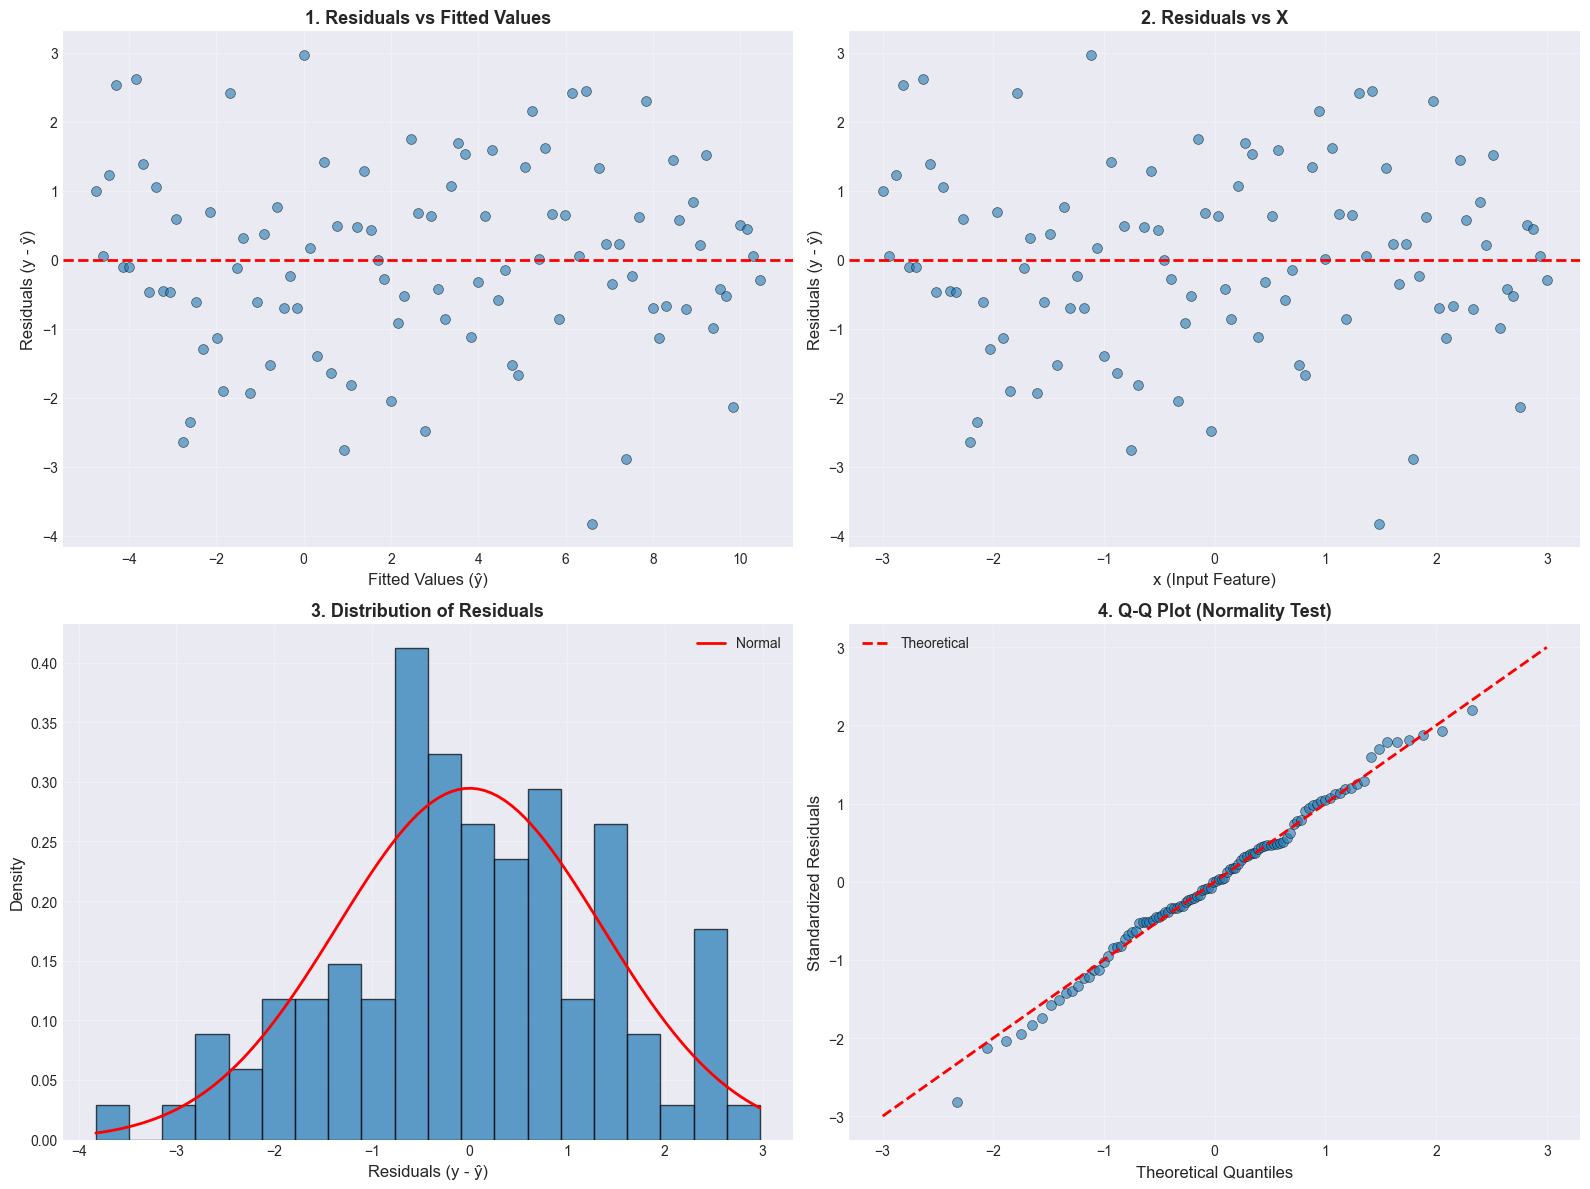

🔬 Residual Analysis Results:
1. Mean of residuals: -0.000000 (should be ≈ 0)
2. Std of residuals:  1.354081
3. Min residual:      -3.8251
4. Max residual:      2.9728

💡 Interpretation:
   - Plots 1 & 2: No pattern, random around 0 → linear model appropriate
   - Plot 3: Bell-shaped → normality assumption satisfied
   - Plot 4: Points near line → normality assumption satisfied


In [38]:
# 11. Residual Analysis (Bonus Feature)

# Residuals
residuals_cf = y - y_pred_cf

# 4 diagnostic plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Residuals vs Fitted Values
ax1 = axes[0, 0]
ax1.scatter(y_pred_cf, residuals_cf, alpha=0.6, s=50, edgecolors='k', linewidth=0.5)
ax1.axhline(y=0, color='r', linestyle='--', linewidth=2)
ax1.set_xlabel('Fitted Values (ŷ)', fontsize=12)
ax1.set_ylabel('Residuals (y - ŷ)', fontsize=12)
ax1.set_title('1. Residuals vs Fitted Values', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)

# 2. Residuals vs X
ax2 = axes[0, 1]
ax2.scatter(X, residuals_cf, alpha=0.6, s=50, edgecolors='k', linewidth=0.5)
ax2.axhline(y=0, color='r', linestyle='--', linewidth=2)
ax2.set_xlabel('x (Input Feature)', fontsize=12)
ax2.set_ylabel('Residuals (y - ŷ)', fontsize=12)
ax2.set_title('2. Residuals vs X', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)

# 3. Histogram of Residuals
ax3 = axes[1, 0]
mu, sigma = residuals_cf.mean(), residuals_cf.std()
ax3.hist(residuals_cf, bins=20, edgecolor='k', alpha=0.7, density=True)
x_hist = np.linspace(residuals_cf.min(), residuals_cf.max(), 100)
ax3.plot(x_hist, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x_hist - mu)/sigma)**2),
         'r-', linewidth=2, label='Normal')
ax3.set_xlabel('Residuals (y - ŷ)', fontsize=12)
ax3.set_ylabel('Density', fontsize=12)
ax3.set_title('3. Distribution of Residuals', fontsize=13, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Q-Q Plot
ax4 = axes[1, 1]
residuals_standardized = (residuals_cf - mu) / sigma
residuals_sorted = np.sort(residuals_standardized)
theoretical_quantiles = stats.norm.ppf(np.linspace(0.01, 0.99, len(residuals_sorted)))
ax4.scatter(theoretical_quantiles, residuals_sorted, alpha=0.6, s=50, edgecolors='k', linewidth=0.5)
ax4.plot([-3, 3], [-3, 3], 'r--', linewidth=2, label='Theoretical')
ax4.set_xlabel('Theoretical Quantiles', fontsize=12)
ax4.set_ylabel('Standardized Residuals', fontsize=12)
ax4.set_title('4. Q-Q Plot (Normality Test)', fontsize=13, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("=" * 80)
print("🔬 Residual Analysis Results:")
print("=" * 80)
print(f"1. Mean of residuals: {residuals_cf.mean():.6f} (should be ≈ 0)")
print(f"2. Std of residuals:  {residuals_cf.std():.6f}")
print(f"3. Min residual:      {residuals_cf.min():.4f}")
print(f"4. Max residual:      {residuals_cf.max():.4f}")
print()
print("💡 Interpretation:")
print("   - Plots 1 & 2: No pattern, random around 0 → linear model appropriate")
print("   - Plot 3: Bell-shaped → normality assumption satisfied")
print("   - Plot 4: Points near line → normality assumption satisfied")
print("=" * 80)


## 12. Summary

### 🎓 What We Learned

This notebook demonstrated how linear regression works **under the hood** by implementing everything from scratch:

#### ✅ **Two Solution Methods:**

1. **Normal Equation (Closed-Form)**
   - ✅ Computes optimal solution in one step
   - ✅ Mathematically exact
   - ❌ Slow for large datasets (matrix operations)
   - Formula: `(X_bias^T X_bias)θ = X_bias^T y`

2. **Gradient Descent**
   - ✅ Iteratively improves
   - ✅ Scalable to large datasets
   - ✅ Can do online learning
   - ❌ Requires tuning (learning rate, iterations)
   - Formula: `θ ← θ - η∇J(θ)`

#### ✅ **Visualizations:**

- **Data Space**: Regression line fitting data
- **Parameter Space (2D)**: Loss contours + GD trajectory
- **Parameter Space (3D)**: Bowl-shaped loss surface
- **Interactive**: Step-by-step exploration with slider

#### ✅ **Evaluation Metrics (Same as sklearn):**

- **R² Score**: Model explains variance in data
- **MSE**: Mean Squared Error
- **RMSE**: Root Mean Squared Error (in original units)
- **MAE**: Mean Absolute Error

#### ✅ **Model Diagnostics:**

- **Residual Analysis**: 4 diagnostic plots
- **Normality Test**: Q-Q plot
- **Model Appropriateness**: Residuals vs fitted/features

### 🆚 Our Implementation vs Sklearn

| Feature | Our Implementation | sklearn.LinearRegression |
|---------|-------------------|-------------------------|
| fit() | ✅ Normal Eq + GD | ✅ Normal Eq |
| predict() | ✅ | ✅ |
| score() (R²) | ✅ | ✅ |
| coef_, intercept_ | ✅ (w, b) | ✅ |
| **Step-by-step trace** | ✅ **Extra!** | ❌ |
| **Interactive viz** | ✅ **Extra!** | ❌ |
| **Residual analysis** | ✅ **Extra!** | ❌ |

### 💡 Key Concepts

1. **Loss Function J(w, b)**: Measures prediction error
2. **Gradient ∇J**: Direction of steepest increase
   - Move opposite direction to decrease loss!
3. **Learning Rate η**: Step size
   - Too large: diverges
   - Too small: slow convergence
4. **Convergence**: Reached when gradient ≈ 0
5. **R² Score**: Model's explanatory power (closer to 1 is better)
6. **Residuals**: Model errors (should be random, normally distributed)

### 🎉 Congratulations!

You now understand how sklearn's LinearRegression works **under the hood**!

**You implemented MORE features than sklearn provides:**
- Step-by-step trace for visualization
- Interactive 3D exploration
- Comprehensive residual analysis
- All evaluation metrics

---

**Next Steps:**
- Try different learning rates
- Experiment with different datasets
- Extend to multiple features
- Add regularization (Ridge/Lasso)
